In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/finaldataset.zip -d /tmp/

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/ccbfedd0-e8d7-4f09-aa7b-98213e408c39___PSU_CG 2216_new30degFlipLR.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/3ecbb7b8-ad66-4944-886e-de2ae2c2c35e___PSU_CG 2095_180deg.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/8b43c3f3-73ae-47bc-a620-079ebeeb10a4___PSU_CG 2094_270deg.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/f73758a1-230b-49a7-87ae-7265232b6b67___PSU_CG 2128_270deg.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/8e59061b-3802-4297-8724-a001efb95268___PSU_CG 2064_180deg.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/57b10f20-7819-40b1-924c-b484c42c515f___PSU_CG 2356_newPixel25.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/6804695f-56f8-4ff9-90f8-69ee95097463___PSU_CG 2067.JPG  
  inflating: /tmp/valid/Tomato___Tomato_mosaic_virus/69d3740b-5aba-47e2-ae2f-46541333c3a5___PSU_CG 2420.JPG  
  inflating: /t

In [ ]:
traindir = "/tmp/train"
validdir = "/tmp/valid"
testdir = ""

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(256, 256),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(256, 256),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 46356 images belonging to 25 classes.
Found 11588 images belonging to 25 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4, 'Corn_(maize)___Common_rust_': 5, 'Corn_(maize)___Northern_Leaf_Blight': 6, 'Corn_(maize)___healthy': 7, 'Grape___Black_rot': 8, 'Grape___Esca_(Black_Measles)': 9, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 10, 'Grape___healthy': 11, 'Potato___Early_blight': 12, 'Potato___Late_blight': 13, 'Potato___healthy': 14, 'Tomato___Bacterial_spot': 15, 'Tomato___Early_blight': 16, 'Tomato___Late_blight': 17, 'Tomato___Leaf_Mold': 18, 'Tomato___Septoria_leaf_spot': 19, 'Tomato___Spider_mites Two-spotted_spider_mite': 20, 'Tomato___Target_Spot': 21, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 22, 'Tomato___Tomato_mosaic_virus': 23, 'Tomato___healthy': 24}


In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
base_model=VGG16(include_top=False,input_shape=(256,256,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(25,activation='softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 25)                819225    
                                                                 
Total params: 15,533,913
Trainable params: 819,225
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=5,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/5
1448/1448 [==============================] - 823s 565ms/step - loss: 0.8697 - accuracy: 0.7598 - val_loss: 0.5483 - val_accuracy: 0.8595
Epoch 2/5
1448/1448 [==============================] - 830s 573ms/step - loss: 0.6424 - accuracy: 0.8386 - val_loss: 0.4150 - val_accuracy: 0.8997
Epoch 3/5
1448/1448 [==============================] - 839s 579ms/step - loss: 0.6091 - accuracy: 0.8612 - val_loss: 0.4910 - val_accuracy: 0.8890
Epoch 4/5
1448/1448 [==============================] - 829s 573ms/step - loss: 0.6036 - accuracy: 0.8710 - val_loss: 0.5923 - val_accuracy: 0.8901
Epoch 5/5
1448/1448 [==============================] - 800s 552ms/step - loss: 0.5378 - accuracy: 0.8862 - val_loss: 0.6570 - val_accuracy: 0.8821


In [ ]:
#Saving our model
filepath="/home/Mymodelvggsix.h5"
classifier.save(filepath)

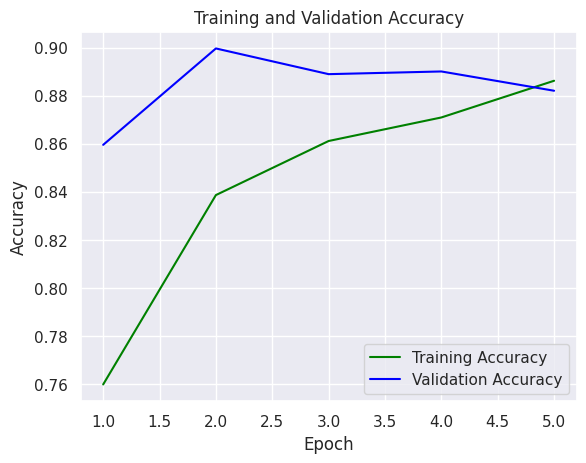

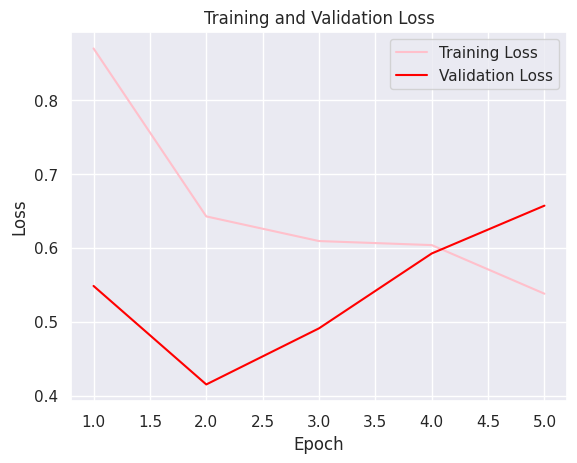

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 [==============================] - 0s 126ms/step


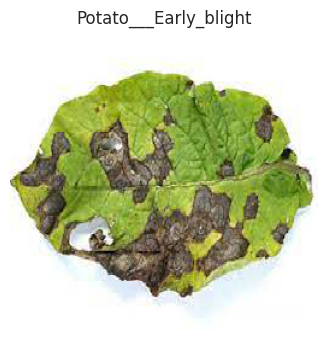

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
image_path = "/content/potatoleaf.jpg"
new_img = tf.keras.utils.load_img(image_path, target_size=(256, 256))
img =tf.keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()